In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ray0911
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project


100%|██████████| 84.1M/84.1M [00:03<00:00, 27.3MB/s]


In [3]:
!nvidia-smi

Thu Jul 25 10:17:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [9]:
from ultralytics import YOLO
# Initialize the model (you can use yolov8n.pt, yolov8s.pt, etc.)
model = YOLO('yolov8n.pt')

results = model.train(
    data='/content/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml',
    epochs=25,          # Based on GPU and available running time I had i decided to stick to a lower epoch
    imgsz=640,          # Increase image size for better detail
    batch=16,           # Maintain batch size for stability
    workers=4,          # Number of workers for data loading
    iou=0.5,            # Standard IoU threshold
    conf=0.01           # Lower confidence threshold to include more detections
)


New https://pypi.org/project/ultralytics/8.2.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.01, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=F

In [17]:
print(type(results))
print(dir(results))


<class 'ultralytics.utils.metrics.DetMetrics'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed']


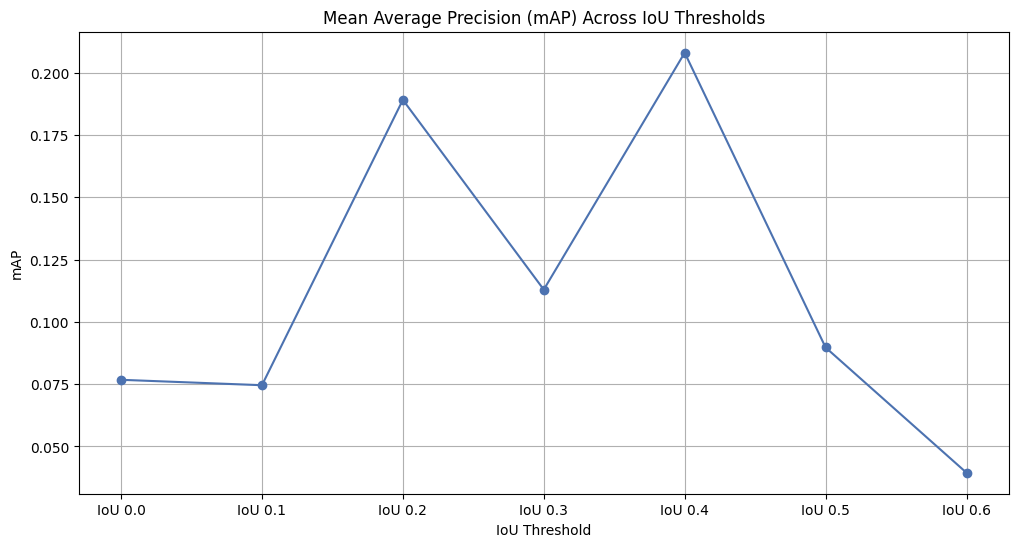

In [23]:
import matplotlib.pyplot as plt

# Extract mAP values
maps = results.maps
thresholds = range(len(maps))  # Assuming each value in maps corresponds to a threshold

# Plot mAP values
plt.figure(figsize=(12, 6))
plt.plot(thresholds, maps, marker='o', linestyle='-', color='b')
plt.xlabel('IoU Threshold')
plt.ylabel('mAP')
plt.title('Mean Average Precision (mAP) Across IoU Thresholds')
plt.grid(True)
plt.xticks(ticks=thresholds, labels=[f'IoU {i/10:.1f}' for i in thresholds])
plt.show()



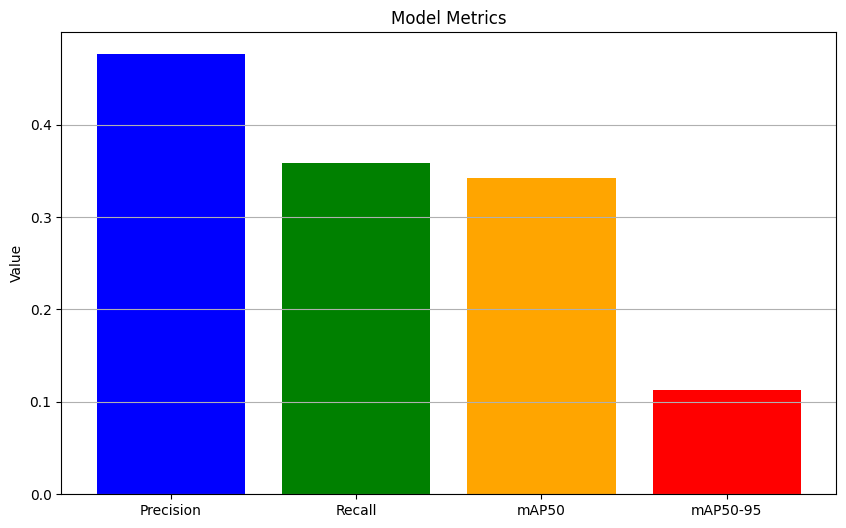

In [24]:
import matplotlib.pyplot as plt

# Extract metrics
metrics_dict = results.results_dict
precision = metrics_dict.get('metrics/precision(B)', None)
recall = metrics_dict.get('metrics/recall(B)', None)
mAP50 = metrics_dict.get('metrics/mAP50(B)', None)
mAP50_95 = metrics_dict.get('metrics/mAP50-95(B)', None)

# Prepare data for plotting
metrics = ['Precision', 'Recall', 'mAP50', 'mAP50-95']
values = [precision, recall, mAP50, mAP50_95]

# Plot metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Value')
plt.title('Model Metrics')
plt.grid(axis='y')
plt.show()


In [29]:
# Check if confusion_matrix attribute is present
if hasattr(results, 'confusion_matrix'):
    print('Confusion matrix attribute found.')
    confusion_matrix = results.confusion_matrix
    print(confusion_matrix)
else:
    print('Confusion matrix attribute not found.')




Confusion matrix attribute found.


In [39]:
# Check if results_dict or similar attribute is available
if hasattr(results, 'results_dict'):
    print('Results dictionary found.')
    results_dict = results.results_dict
    print(results_dict)
else:
    print('Results dictionary not found.')


Results dictionary found.
{'metrics/precision(B)': 0.47612022426075934, 'metrics/recall(B)': 0.3584828695378714, 'metrics/mAP50(B)': 0.3418078550080306, 'metrics/mAP50-95(B)': 0.11291414364370118, 'fitness': 0.13580351478013414}


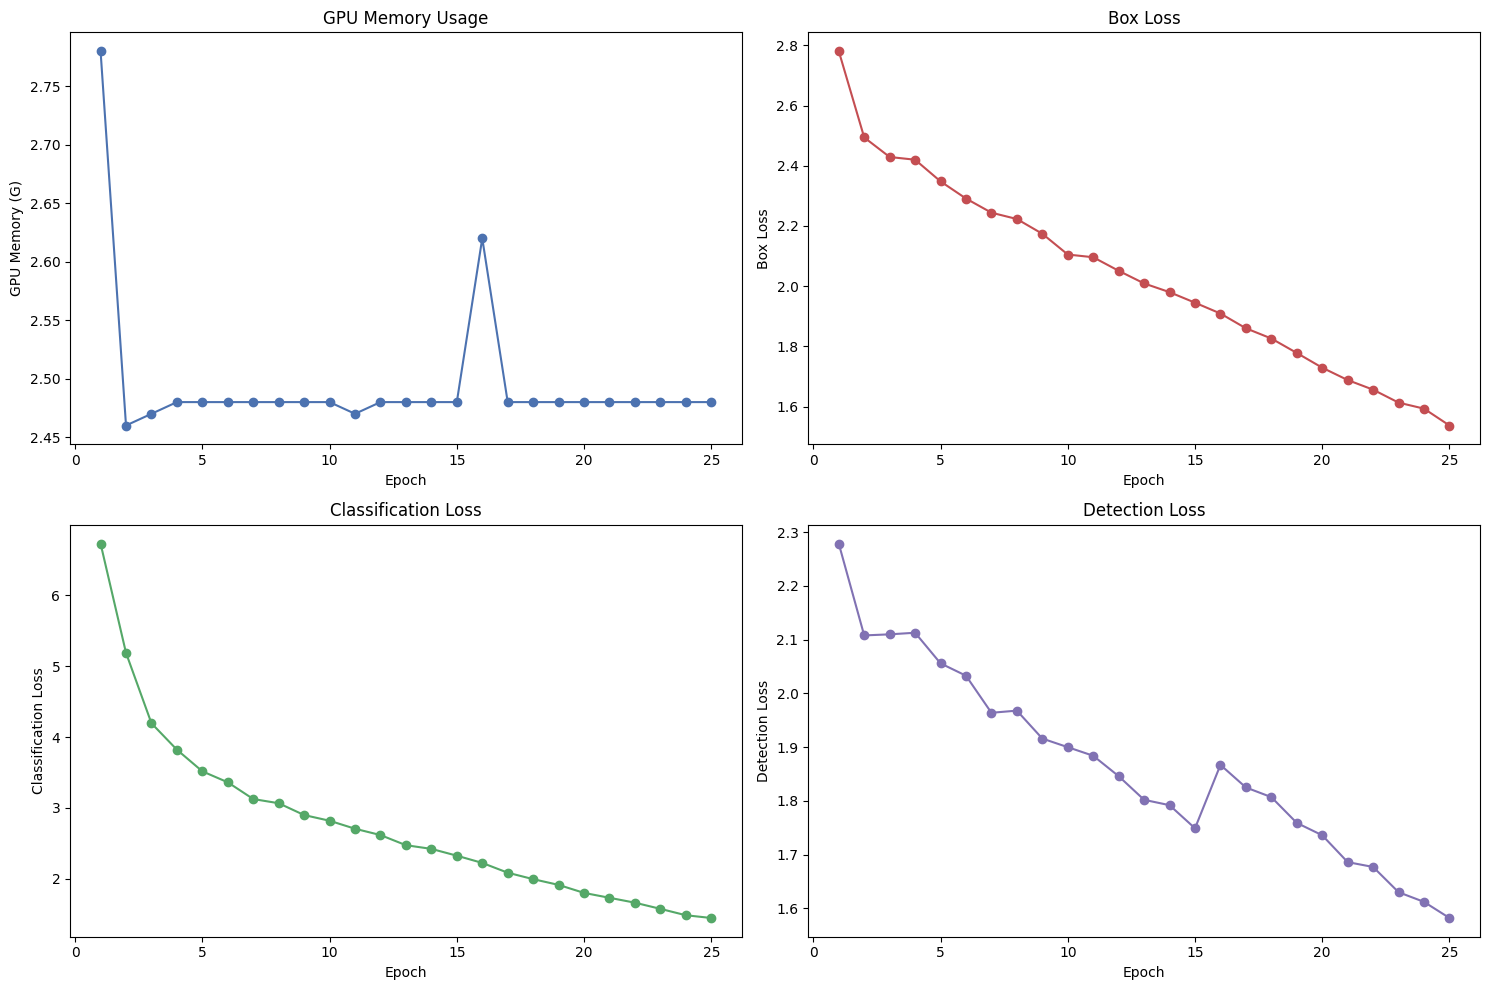

In [37]:
import matplotlib.pyplot as plt

# Data extracted from your log
epochs = list(range(1, 26))
gpu_mem = [2.78, 2.46, 2.47, 2.48, 2.48, 2.48, 2.48, 2.48, 2.48, 2.48, 2.47, 2.48, 2.48, 2.48, 2.48, 2.62, 2.48, 2.48, 2.48, 2.48, 2.48, 2.48, 2.48, 2.48, 2.48]
box_loss = [2.781, 2.494, 2.429, 2.42, 2.348, 2.291, 2.244, 2.223, 2.174, 2.105, 2.096, 2.051, 2.009, 1.98, 1.945, 1.909, 1.86, 1.826, 1.778, 1.729, 1.688, 1.656, 1.613, 1.593, 1.537]
cls_loss = [6.729, 5.187, 4.194, 3.821, 3.516, 3.361, 3.125, 3.066, 2.899, 2.819, 2.706, 2.617, 2.474, 2.422, 2.326, 2.224, 2.086, 1.995, 1.914, 1.801, 1.732, 1.663, 1.576, 1.486, 1.447]
dfl_loss = [2.279, 2.108, 2.11, 2.113, 2.056, 2.033, 1.964, 1.968, 1.916, 1.9, 1.884, 1.846, 1.802, 1.792, 1.749, 1.867, 1.825, 1.807, 1.759, 1.736, 1.686, 1.677, 1.63, 1.612, 1.582]

# Plot GPU memory usage
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs, gpu_mem, marker='o', linestyle='-', color='b')
plt.title('GPU Memory Usage')
plt.xlabel('Epoch')
plt.ylabel('GPU Memory (G)')

# Plot box loss
plt.subplot(2, 2, 2)
plt.plot(epochs, box_loss, marker='o', linestyle='-', color='r')
plt.title('Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')

# Plot classification loss
plt.subplot(2, 2, 3)
plt.plot(epochs, cls_loss, marker='o', linestyle='-', color='g')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')

# Plot detection loss
plt.subplot(2, 2, 4)
plt.plot(epochs, dfl_loss, marker='o', linestyle='-', color='m')
plt.title('Detection Loss')
plt.xlabel('Epoch')
plt.ylabel('Detection Loss')

plt.tight_layout()
plt.show()



In [40]:
print(dir(results))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed']


In [53]:
print(dir(results))  # List attributes and methods
print(vars(results))  # List attributes as a dictionary


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed']
{'save_dir': PosixPath('runs/detect/train4'), 'plot': True, 'on_plot': <bound method BaseValidator.on_plot of <ultralytics.models.yolo.detect.val.DetectionValidator object at 0x7c70e340fc70>>, 'names': {0: 'elbow positive', 1: 'fingers positive', 2: 'forearm fracture', 3: 'humerus fracture', 4: 'humerus', 5: 'shoulder fracture', 6: 'wrist positive'}, 'box': ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[    0.24168,     0.13537, 

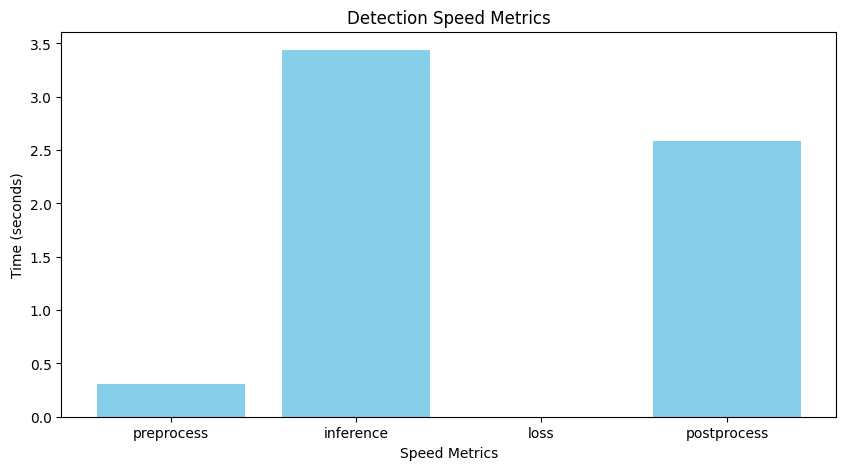

In [55]:
import matplotlib.pyplot as plt

# Extract speed metrics
speed_metrics = results.speed
labels = list(speed_metrics.keys())
values = list(speed_metrics.values())

# Plot speed metrics
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Speed Metrics')
plt.ylabel('Time (seconds)')
plt.title('Detection Speed Metrics')
plt.show()


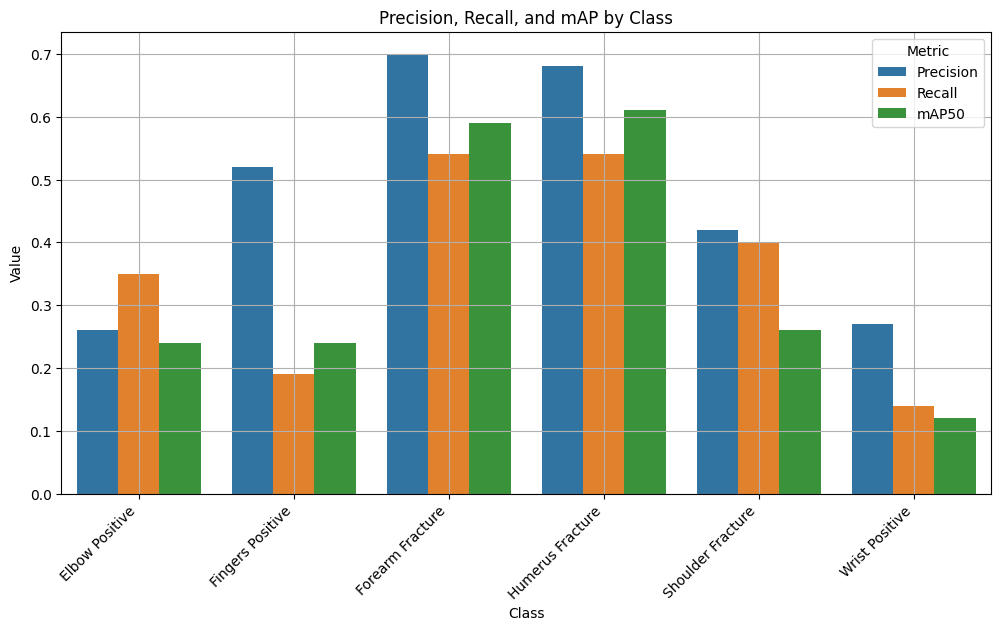

In [87]:
import seaborn as sns
import pandas as pd

data = {
    'Class': ['Elbow Positive', 'Fingers Positive', 'Forearm Fracture', 'Humerus Fracture', 'Shoulder Fracture', 'Wrist Positive'],
    'Precision': [0.26, 0.52, 0.70, 0.68, 0.42, 0.27],
    'Recall': [0.35, 0.19, 0.54, 0.54, 0.40, 0.14],
    'mAP50': [0.24, 0.24, 0.59, 0.61, 0.26, 0.12]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Class', var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Value', hue='Metric', data=df_melted)
plt.xlabel('Class')
plt.ylabel('Value')
plt.title('Precision, Recall, and mAP by Class')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.grid(True)
plt.show()



image 1/1 /content/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_3726_png.rf.2876d2f0108b5a9fb5c23e8fb95f4625.jpg: 640x288 (no detections), 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 288)


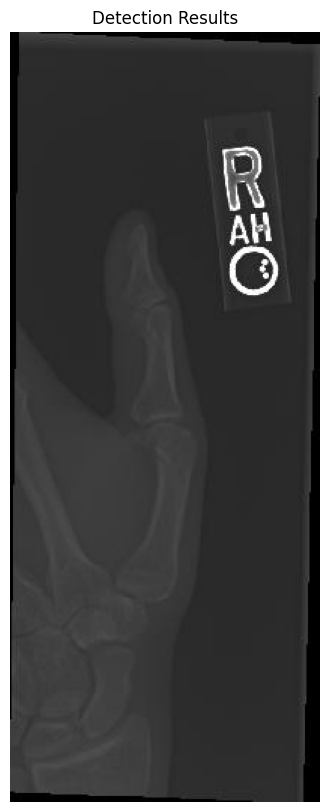


image 1/1 /content/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_635_png.rf.87aa3f97aeaffa79004761ae1f895cac.jpg: 640x512 (no detections), 78.2ms
Speed: 2.7ms preprocess, 78.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


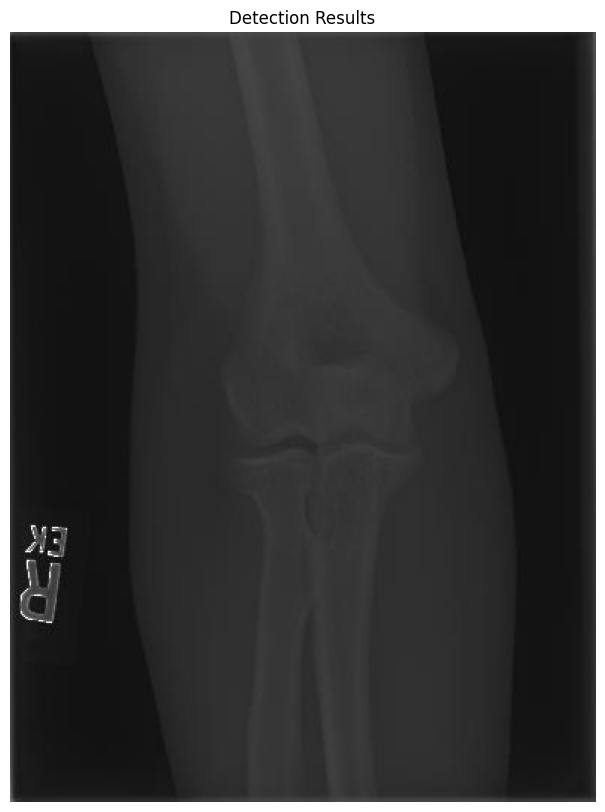


image 1/1 /content/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images/image1_537_png.rf.06ee5106226a244e50fa61450224633b.jpg: 640x544 (no detections), 68.4ms
Speed: 3.2ms preprocess, 68.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


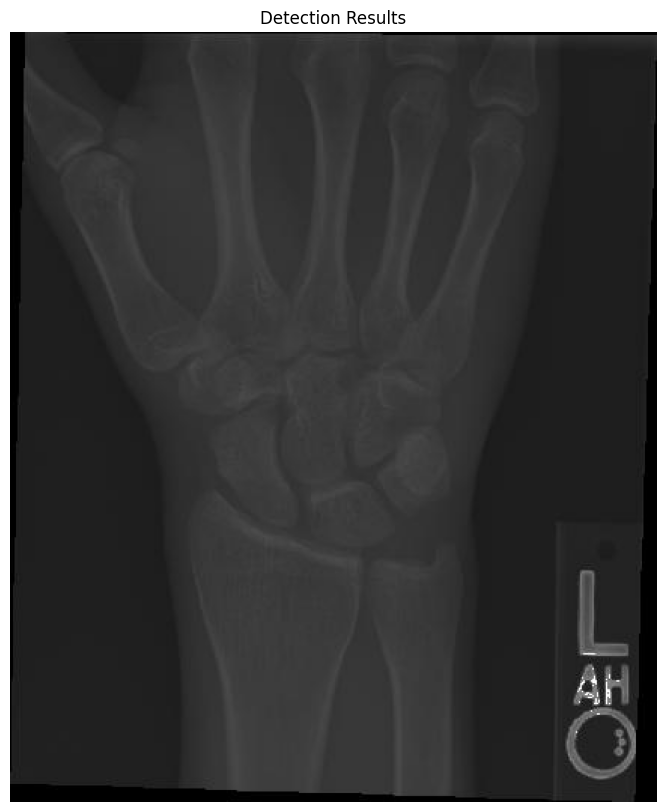

In [93]:
import cv2
import os



# Path to test images
test_images_dir = '/content/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images'

# Get list of test image files
test_image_files = [os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Function to visualize detections
def visualize_predictions(image_path, boxes, names, scores):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    ax = plt.gca()
    for box, name, score in zip(boxes, names, scores):
        x1, y1, x2, y2 = map(int, box)
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        plt.text(x1, y1, f"{name} ({score:.2f})", color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
    plt.title('Detection Results')
    plt.axis('off')
    plt.show()

# Predict and visualize results for each test image
for image_path in test_image_files[:3]:  # Adjust this to limit the number of images
    results = model.predict(image_path)

    # Extract boxes, names, and scores from the result
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes
        scores = result.boxes.conf.cpu().numpy()  # Confidence scores
        names = [result.names[int(cls)] for cls in result.boxes.cls.cpu().numpy()]  # Class names

        visualize_predictions(image_path, boxes, names, scores)
